## 2022 Card data


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_games = pd.read_excel('./data/2022 MatchRef for Ryan.xlsx')
df_yellows = pd.read_excel('./data/2022 Yellow Card Register MASTER.xlsx', sheet_name='YELLOW CARD REGISTER')

In [38]:
## ------------ Filter down to just NPLM 1st Grade and Res
df_yellows =  df_yellows[df_yellows['GRADE'].isin(['1st'])] # Res', 
df_yellows =  df_yellows[df_yellows['COMPETITION'].isin(['NPLM'])] #NPL options brings in random NL1 clubs

In [24]:
df_yellows.columns

Index(['ROUND', 'COMPETITION', 'GRADE', 'DATE', 'VENUE', 'FIRST NAME',
       'SURNAME', 'CLUB', 'INFRINGEMENT', 'PLAYER/TEAM OFFICIAL', 'COUNT',
       'NOTES'],
      dtype='object')

In [61]:
df_grouped = df_yellows.groupby(['COMPETITION', 'GRADE', 'CLUB', 'INFRINGEMENT'])[['VENUE']].count().reset_index().sort_values('VENUE', ascending=False)
df_grouped = df_grouped.rename(columns={'VENUE':'TOTAL'})

In [62]:
df_grouped 

,COMPETITION,GRADE,CLUB,INFRINGEMENT,TOTAL
0,NPLM,1st,Adamstown Rosebud FC,Y1,35
7,NPLM,1st,Charlestown Azzurri FC,Y1,33
32,NPLM,1st,Newcastle Olympic FC,Y1,28
11,NPLM,1st,Cooks Hill United FC,Y1,28
40,NPLM,1st,Weston Workers FC,Y1,24
26,NPLM,1st,Maitland FC,Y1,24
16,NPLM,1st,Edgeworth FC,Y1,20
4,NPLM,1st,Broadmeadow Magic FC,Y1,19
19,NPLM,1st,Lake Macquarie City FC,Y1,19
23,NPLM,1st,Lambton Jaffas FC,Y1,16


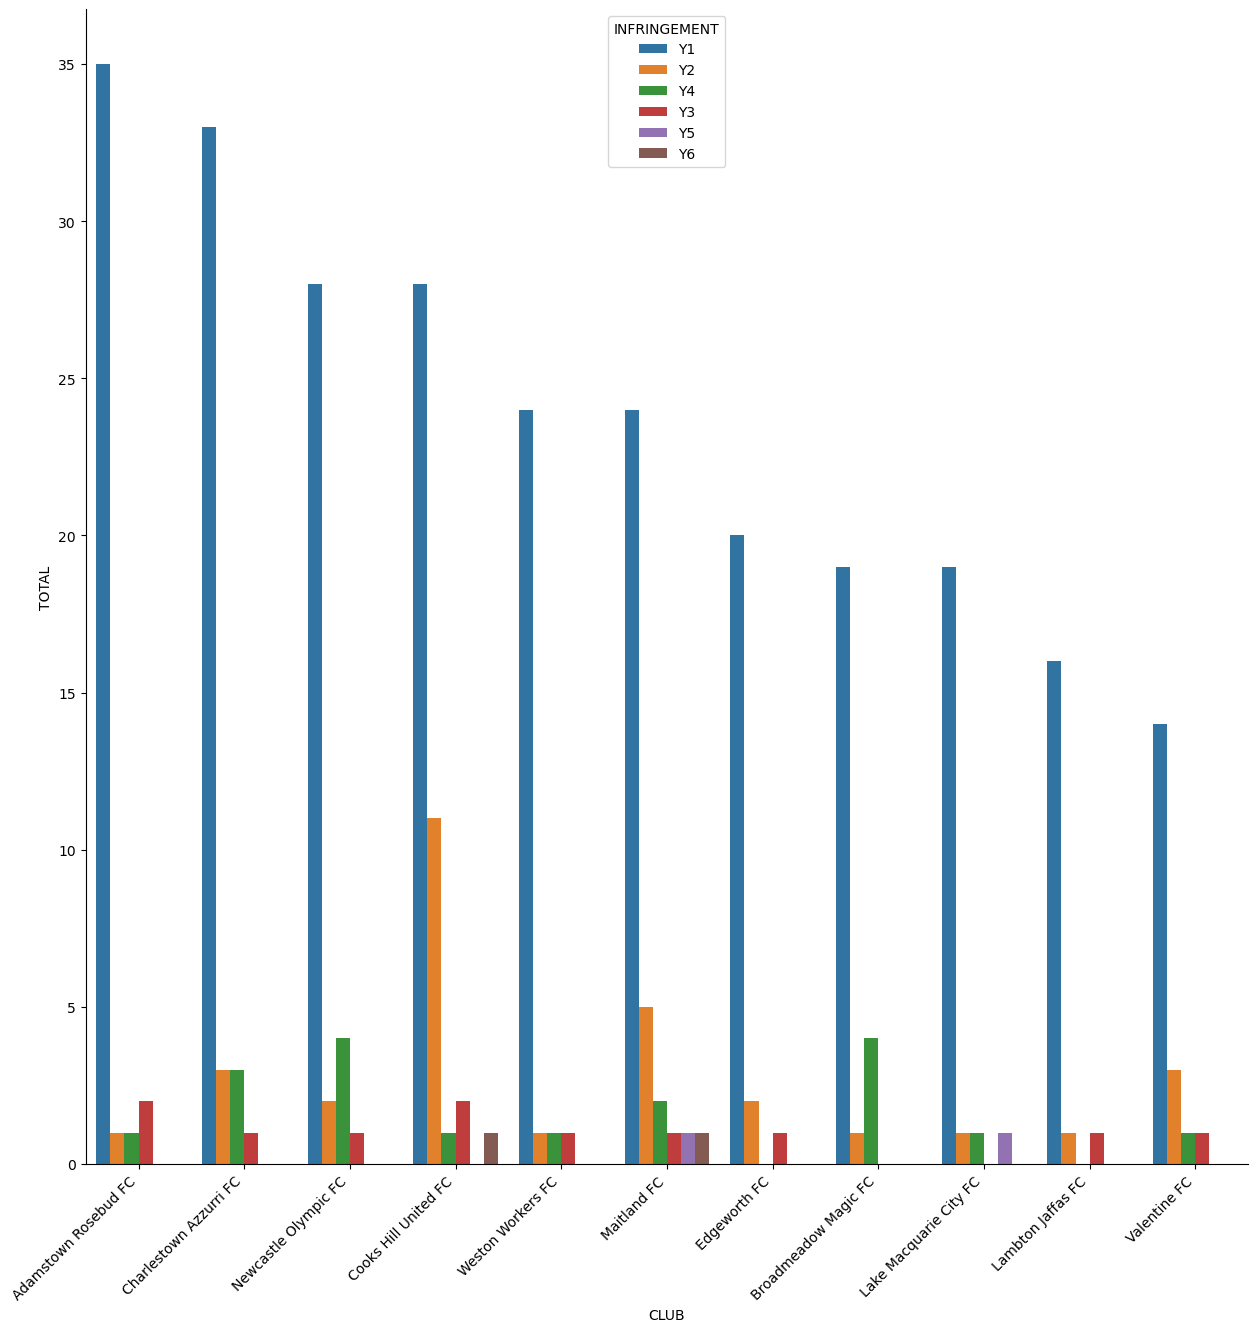

In [63]:
plt.figure(figsize=(15,15))
sns.barplot(x='CLUB',
            y='TOTAL',
            hue='INFRINGEMENT',
            data=df_grouped)
sns.despine()
plt.xticks(rotation= 45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Number of Yellow Cards by Round NPLM 1st Grade')

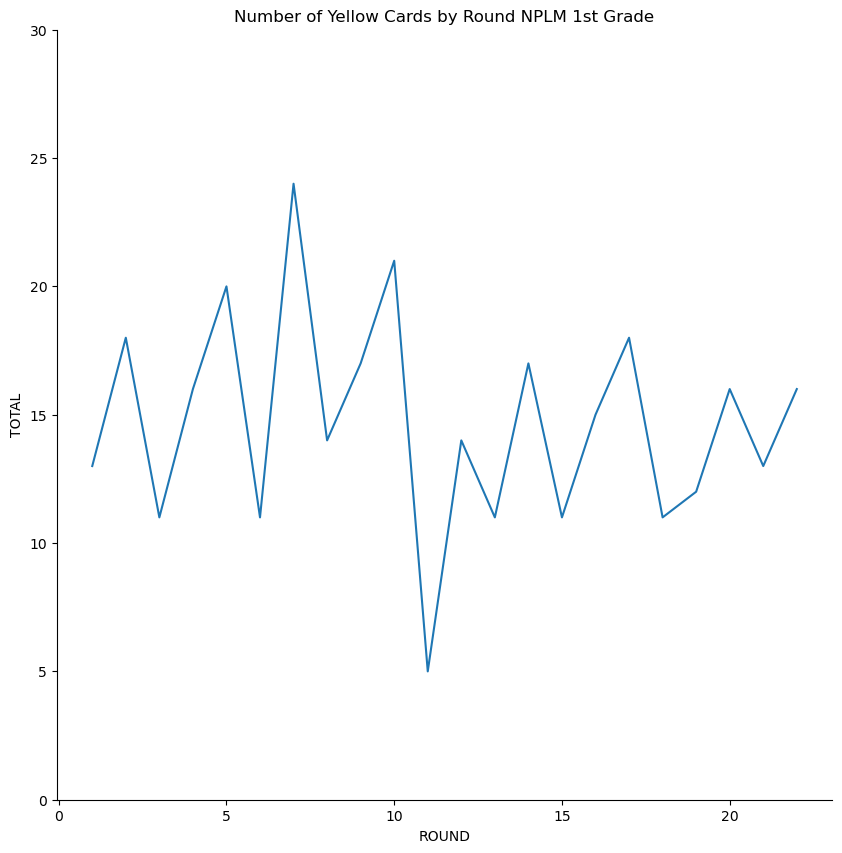

In [78]:
df_grouped = df_yellows.groupby(['COMPETITION','ROUND'])[['VENUE']].count().reset_index().sort_values('VENUE', ascending=False)
df_grouped = df_grouped.rename(columns={'VENUE':'TOTAL'})

plt.figure(figsize=(10,10))
sns.lineplot(x='ROUND',
             y='TOTAL',
             #hue='CLUB',
             data=df_grouped)
sns.despine()
plt.ylim(0,30)
plt.title('Number of Yellow Cards by Round NPLM 1st Grade')

In [93]:
#Average Cards per Game
df_card_count = df_yellows.groupby(['CLUB'])[['VENUE']].count().reset_index().sort_values('VENUE', ascending=False)
df_card_count = df_card_count.rename(columns={'VENUE': 'TOTAL'})
df_card_count['AVG PER GAME'] = round(df_card_count['TOTAL']/22,2)
max_cards = df_yellows.groupby(['CLUB', 'ROUND']).[['VENUE']].count().reset_index()
#df_card_count['MAX IN GAME'] = df_card_count['TOTAL'].max()
#df_card_count


,CLUB,TOTAL,AVG PER GAME,MAX IN GAME
3,Cooks Hill United FC,43,1.95,43
2,Charlestown Azzurri FC,40,1.82,43
0,Adamstown Rosebud FC,39,1.77,43
8,Newcastle Olympic FC,35,1.59,43
7,Maitland FC,34,1.55,43
10,Weston Workers FC,27,1.23,43
1,Broadmeadow Magic FC,24,1.09,43
4,Edgeworth FC,23,1.05,43
5,Lake Macquarie City FC,22,1.00,43
9,Valentine FC,19,0.86,43
